### **Lista 5**
##### Rafał Głodek
***

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
from scipy.optimize import fsolve
from numpy.linalg import solve

Zadanie 1

In [2]:
def poly_interpol(x, y):
    omega = np.poly1d([1])
    n = len(x)
    for i in range(n):
        omega = np.polymul(omega, np.poly1d([1, -x[i]]))
    w = np.poly1d([0])
    omega_p = np.polyder(omega, 1)
    for i in range(n):
        omega_px = omega_p(x[i])
        w = np.polyadd(w, y[i] * np.polydiv(omega, np.poly1d([1,-x[i]]) * omega_px)[0])
    return w
    

In [3]:
print(poly_interpol([0,3,6], [1.255, 0.905, 0.652]))

          2
0.005389 x - 0.1328 x + 1.255


Zadanie 2

In [4]:
from scipy.interpolate import CubicSpline

In [5]:
spl = CubicSpline([0.2, 2, 20, 200, 2000, 20000], [103, 13.9, 2.72, 0.8, 0.401, 0.433])

In [6]:
Re = [5, 50, 5000]
for r in Re:
    print(f"Wartość dla Re = {r}:\nc = {spl(r)}")

Wartość dla Re = 5:
c = -84.02350372537349
Wartość dla Re = 50:
c = 436.413792186683
Wartość dla Re = 5000:
c = 54738.99116845934


Zadanie 3

In [7]:
print("Interpolacja wielomianowa (zad 1)")
c_d = poly_interpol([0.2, 2, 20, 200, 2000, 20000], [103, 13.9, 2.72, 0.8, 0.401, 0.433])
for r in Re:
    print(f"Wartość dla Re = {r}:\nc = {c_d(r)}")

Interpolacja wielomianowa (zad 1)
Wartość dla Re = 5:
c = -96.10046207185488
Wartość dla Re = 50:
c = 2581.144117967352
Wartość dla Re = 5000:
c = 1658455172.0854998


Zadanie 4

Nakładamy logarytm na funkcję aproksymującą $f$
$$
g(x) = \ln(f) = \ln(ae ^ {bx}) = \ln(a) + bx = c + bx
$$

I robimy klasyczną regresję liniową dla funkcji $g$. Wzory:
$$
b = \frac{\sum(X_i - \overline{X})(Y_i - \overline{Y})}{\sum(X_i - \overline{X})^{2}}
$$
$$
c = \overline{Y} - b\overline{X}
$$

In [8]:
def linear_regression(x,y):
    b = np.sum((x-np.mean(x)) * (y - np.mean(y)))/np.sum((x - np.mean(x))**2)
    c = np.mean(y) - b * np.mean(x)
    return b, c

In [9]:
xs = np.array([1.2,2.8,4.3,5.4,6.8,7.9])
ys = np.array([7.5,16.1,38.9,67.0,146.6,266.2])
ys_log = np.log(ys)

In [17]:
b, c = linear_regression(xs, ys_log)
a = np.exp(c)
f_approx = lambda x: a * np.exp(b * x)

In [21]:
x_lin = np.linspace(1,9,1000)
y_approx = f_approx(x_lin)

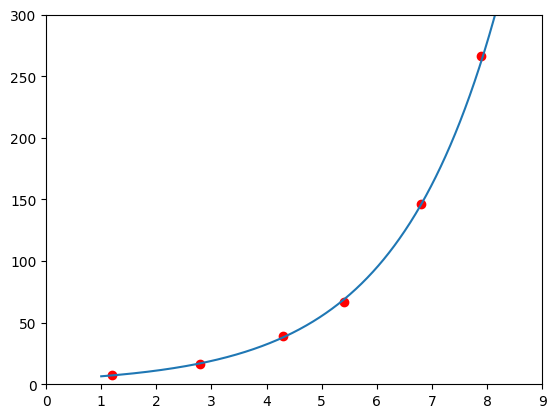

In [22]:
plt.scatter(xs, ys, c="r")
plt.plot(x_lin, y_approx)
plt.ylim(0,300)
plt.xlim(0,9)
plt.show()

In [24]:
y_approx2 = f_approx(xs)
errors = ys - y_approx2
print(f"Odchylenie standardowe błędów: {np.std(errors)}")

Odchylenie standardowe błędów: 1.6397439579596658


Zadanie 5

In [30]:
def poly_approximation(m, x, y):
    mat = np.zeros((m+1, m+1))
    b = np.zeros(m+1)
    for i in range(m+1):
        for k in range(m+1):
            mat[i][k] = np.sum(x ** (i + k))
        b[i] = np.sum(y * x ** i)
    coeffs = solve(mat, b)
    return np.flip(coeffs)

In [34]:
x, y = np.array([0,21.1,37.8,54.4, 71.1, 87.8, 100]), np.array([1.79,1.13,0.696,0.519,0.338, 0.321, 0.296])

In [35]:
poly_approx = np.poly1d(poly_approximation(3, x, y))
poly_approx_build_in = np.poly1d(np.polyfit(x, y, deg=3))

In [ ]:
x2 = [10, 30, 60, 90]

In [37]:
for x in x2:
    print(f"Wynik aproksymacji własnej dla T = {x}: {poly_approx(x)}\n")
    print(f"Wynik aproksymacji wbudowanej dla T = {x}: {poly_approx_build_in(x)}\n")

Wynik aproksymacji własnej dla T = 10: 1.4345071783718424

Wynik aproksymacji wbudowanej dla T = 10: 1.4345071783718335

Wynik aproksymacji własnej dla T = 30: 0.8889438745121653

Wynik aproksymacji wbudowanej dla T = 30: 0.8889438745121383

Wynik aproksymacji własnej dla T = 60: 0.4365697400923958

Wynik aproksymacji wbudowanej dla T = 60: 0.43656974009240557

Wynik aproksymacji własnej dla T = 90: 0.3015529833900419

Wynik aproksymacji wbudowanej dla T = 90: 0.30155298339005343



Zadanie 6

In [38]:
x = np.array([1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7])
y = np.array([6.008, 15.722, 27.13, 33.772, 5.257, 9.549, 11.098, 28.828])

In [39]:
linear_approx = np.poly1d(poly_approximation(1, x, y))
quadratic_approx = np.poly1d(poly_approximation(2, x, y))

In [43]:
x_lin = np.arange(1, 4.1, 0.1)

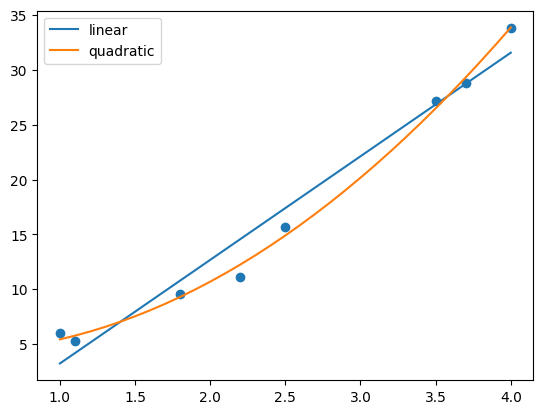

In [44]:
plt.scatter(x, y)
plt.plot(x_lin, linear_approx(x_lin), label="linear")
plt.plot(x_lin, quadratic_approx(x_lin), label="quadratic")
plt.legend(loc="best")
plt.show()

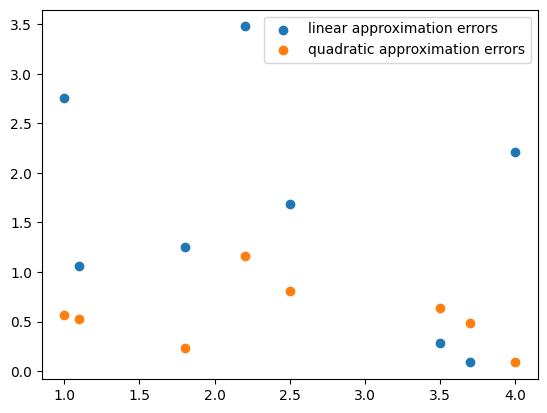

In [46]:
linear_approx_values = linear_approx(x)
quadratic_approx_values = quadratic_approx(x)
errors_linear = abs(linear_approx_values - y)
errors_quadratic = abs(quadratic_approx_values - y)
plt.scatter(x, errors_linear, label="linear approximation errors")
plt.scatter(x, errors_quadratic, label="quadratic approximation errors")
plt.legend(loc="best")
plt.show()

In [47]:
mse_linear = np.mean((y - linear_approx_values)**2)
mse_quadratic = np.mean((y - quadratic_approx_values)**2)

print(f"MSE dla aproksymacji liniowej: {mse_linear:.4f}")
print(f"MSE dla aproksymacji kwadratowej: {mse_quadratic:.4f}")

MSE dla aproksymacji liniowej: 3.7752
MSE dla aproksymacji kwadratowej: 0.4130
